# Fraud Detection System

### Modules in the Project

- Data Loading System
- Dataset Wrangling System
- Normalization and Encoding System
- Dataset Visualization System
- Model Training System
- Hperparameter Tuning
- Model Metric Calculation System
- Database System
- View manager
- Template Manager
- Model integration

---

*Contributors*
1. [Apurva Jaiswal](https://github.com/ApurvaJaiswal3398/)
2. [Suyash Mihir](https://github.com/mihirsuyash7/)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report

Loading Dataset and Counting the number of 'isFraud' values

In [7]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/Fraud_Detection_Dataset.csv')
df['isFraud'].value_counts()

<ipython-input-7-1d5e77f84d09>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Dataset/Fraud_Detection_Dataset.csv')


0    1918190
1       4092
Name: isFraud, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922282 entries, 0 to 1922281
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 161.3+ MB


Counting the 'NaN' values for 'isFraud' Column

In [10]:
pd.isna(df['isFraud']).value_counts()

False    1922282
Name: isFraud, dtype: int64

Creating new Dataframe without Non-numerical Columns

In [11]:
df_new=df.drop(['isFraud','type','nameOrig','nameDest'],axis=1)
df_new

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,143236.26,0.00,143236.26,0.00,0.00,0
1,1,228451.89,143236.26,371688.15,0.00,0.00,0
2,1,65912.95,640544.28,706457.23,0.00,0.00,0
3,1,349640.51,1023111.71,1372752.22,0.00,0.00,0
4,1,135324.19,1372752.22,1508076.41,0.00,0.00,0
...,...,...,...,...,...,...,...
1922277,718,2609.21,5070.00,2460.79,144193.72,146802.93,0
1922278,718,2063.08,328612.00,326548.92,1312720.98,1314784.06,0
1922279,718,425.65,4046.00,3620.35,3009282.73,3009708.38,0
1922280,718,2148.99,49632.00,47483.01,66241.39,68390.38,0


In [12]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,0,0.00,0.00,0,0
1,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,0,0.00,0.00,0,0
2,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,0,0.00,0.00,0,0
3,1,CASH_IN,349640.51,C1493042329,1023111.71,1372752.22,0,0.00,0.00,0,0
4,1,CASH_IN,135324.19,C1751403001,1372752.22,1508076.41,0,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1922277,718,DEBIT,2609.21,C1546763667,5070.00,2460.79,C1242258329,144193.72,146802.93,0,0
1922278,718,DEBIT,2063.08,C397492133,328612.00,326548.92,C1557979171,1312720.98,1314784.06,0,0
1922279,718,DEBIT,425.65,C1835928822,4046.00,3620.35,C701975669,3009282.73,3009708.38,0,0
1922280,718,DEBIT,2148.99,C1909103796,49632.00,47483.01,C1931871221,66241.39,68390.38,0,0


Splitting the Dataset into *Training* and *Testing Datasets*

In [13]:
from sklearn.model_selection import train_test_split
X = df_new
Y = df['isFraud']
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (1537825, 7)
Number transactions y_train dataset:  (1537825,)
Number transactions X_test dataset:  (384457, 7)
Number transactions y_test dataset:  (384457,)


In [14]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
1847253,404,10801.07,21477.00,10675.93,0.0,10801.07,0
283500,163,27294.48,1990655.69,2017950.17,0.0,0.00,0
1235666,34,7774.18,208304.85,200530.67,0.0,7774.18,0
1035363,160,120664.84,248827.00,128162.16,0.0,0.00,0
986921,687,231144.28,14145508.71,14376652.99,0.0,0.00,0
...,...,...,...,...,...,...,...
152315,45,514601.58,608932.27,1123533.85,0.0,0.00,0
963395,565,59876.13,107146.00,167022.13,0.0,0.00,0
117952,39,1344.30,34835.00,36179.30,0.0,0.00,0
1484405,211,1778.32,23826.00,22047.68,0.0,1778.32,0


In [15]:
tr = y_train == 1
tr.value_counts()

False    1534585
True        3240
Name: isFraud, dtype: int64

In [16]:
X_test

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
827696,373,316756.41,30578.00,347334.41,0.0,0.00,0
474625,234,1119.06,20396.00,21515.06,0.0,0.00,0
1537959,238,10.95,10635.00,10624.05,0.0,10.95,0
1484543,211,13896.72,41676.00,27779.28,0.0,13896.72,0
1671600,307,11286.93,78865.33,67578.40,0.0,11286.93,0
...,...,...,...,...,...,...,...
834761,375,136757.03,1550.00,138307.03,0.0,0.00,0
198683,135,489220.48,8026.00,497246.48,0.0,0.00,0
657439,306,90643.76,26752.00,117395.76,0.0,0.00,0
658784,306,119852.68,1783804.07,1903656.75,0.0,0.00,0


In [17]:
(y_test == 1).value_counts()

False    383605
True        852
Name: isFraud, dtype: int64

Applying Logistic Regression and Checking the Accuracy

In [18]:
# logistic regression object
model = LogisticRegression(solver='sag')

# train the model on train set
model.fit(X_train, y_train.ravel())

predictions = model.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    383605
           1       0.00      0.00      0.00       852

    accuracy                           1.00    384457
   macro avg       0.50      0.50      0.50    384457
weighted avg       1.00      1.00      1.00    384457



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Implementing SMOTE to balance the Dataset

In [19]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 3240
Before OverSampling, counts of label '0': 1534585 

After OverSampling, the shape of train_X: (3069170, 7)
After OverSampling, the shape of train_y: (3069170,) 

After OverSampling, counts of label '1': 1534585
After OverSampling, counts of label '0': 1534585


In [20]:
X_train_res

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,404,1.080107e+04,2.147700e+04,10675.93,0.0,10801.07,0
1,163,2.729448e+04,1.990656e+06,2017950.17,0.0,0.00,0
2,34,7.774180e+03,2.083049e+05,200530.67,0.0,7774.18,0
3,160,1.206648e+05,2.488270e+05,128162.16,0.0,0.00,0
4,687,2.311443e+05,1.414551e+07,14376652.99,0.0,0.00,0
...,...,...,...,...,...,...,...
3069165,236,8.516381e+05,8.516381e+05,0.00,0.0,0.00,0
3069166,568,4.768525e+04,4.768525e+04,0.00,0.0,0.00,0
3069167,604,2.196361e+06,2.196361e+06,0.00,0.0,0.00,0
3069168,480,3.774771e+06,3.774771e+06,0.00,0.0,0.00,0


In [21]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1])

In [24]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['isFraud', 'type', 'nameOrig', 'nameDest', 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']))])

Applying Logistic Regression on the oversampled data

In [25]:
# logistic regression object
model = LogisticRegression(solver='sag')

# train the model on train set
model.fit(X_train_res, y_train_res.ravel())

predictions = model.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



              precision    recall  f1-score   support

           0       1.00      0.99      0.99    383605
           1       0.16      1.00      0.27       852

    accuracy                           0.99    384457
   macro avg       0.58      0.99      0.63    384457
weighted avg       1.00      0.99      0.99    384457



<Axes: >

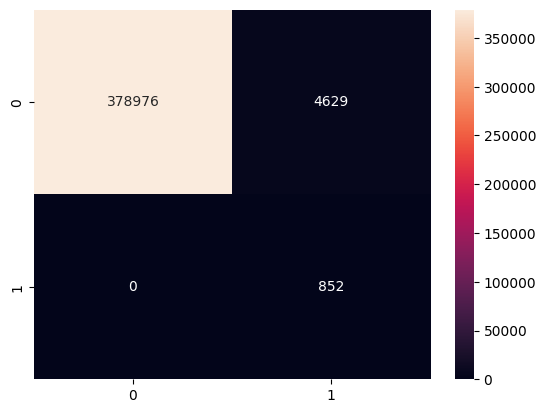

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')

In [27]:
ypred = predictions > 0.5
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    383605
           1       0.16      1.00      0.27       852

    accuracy                           0.99    384457
   macro avg       0.58      0.99      0.63    384457
weighted avg       1.00      0.99      0.99    384457



#### Save the model

In [29]:
from joblib import dump
model.save('ann_fraud_detection.h5')
dump(p, 'ann_fraud_detection_preprocessor.jb')

AttributeError: ignored

In [ ]:
from tensorflow.keras.models import Sequential              # model type
from tensorflow.keras.layers import Dense, Dropout          # dense layer, dropout layer
from tensorflow.keras.activations import relu, sigmoid      # activation functions
from tensorflow.keras.optimizers import SGD                 # stochastic gradient descent
from tensorflow.keras.losses import binary_crossentropy     # cost function

In [ ]:
from joblib import load
def load_model():
    model = tf.keras.models.load_model('ann_fraud_detection.h5')
    return model

def load_preprocessor():
    p = load('ann_fraud_detection_preprocessor.jb')
    return p

In [ ]:
existing_model = load_model()
p = load_preprocessor()
existing_model.summary()

In [ ]:
def predict_fraud(model, data):
    data = p.transform(data)
    prediction = model.predict(data)
    return prediction

In [ ]:
data = pd.DataFrame({
    'step': [1],
    'type': ['CASH_OUT'],
    'amount': [1000],
    'name_orig': ['C123450428'],
    'oldbalanceOrg': [1000],
    'newbalanceOrig': [0],
    'name_dest': ['M123451249'],
    'oldbalanceDest': [0],
    'newbalanceDest': [0],
})

out = predict_fraud(existing_model, data)
print(out[0][0] > 0.5)